# `beeswarm` plot

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.beeswarm` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is a classification task to predict if people made over \\$50k in the 1990s).

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 98%|===================| 32071/32561 [00:58<00:00]        

## A simple beeswarm summary plot

The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model's output. Each instance the given explanation is represented by a single dot on each feature fow. The x position of the dot is determined by the SHAP value (`shap_values.value[instance,feature]`) of that feature, and dots "pile up" along each feature row to show density. Color is used to display the original value of a feature (`shap_values.data[instance,feature]`). In the plot below we can see that Age is the most important feature on average, and than young (blue) people are less likely to make over \\$50k.  

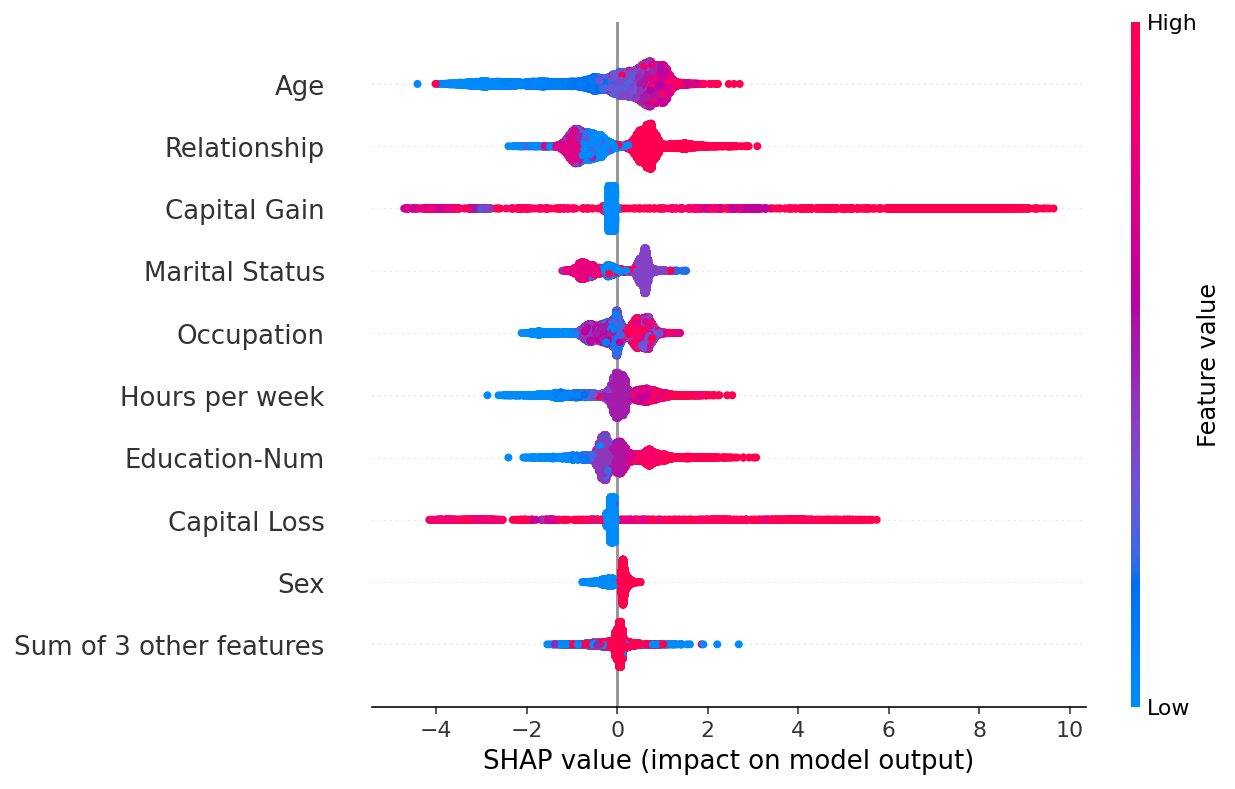

In [2]:
shap.plots.beeswarm(shap_values)

By default the maximum number of features shown is ten, but this can be adjusted with the `max_display` parameter:

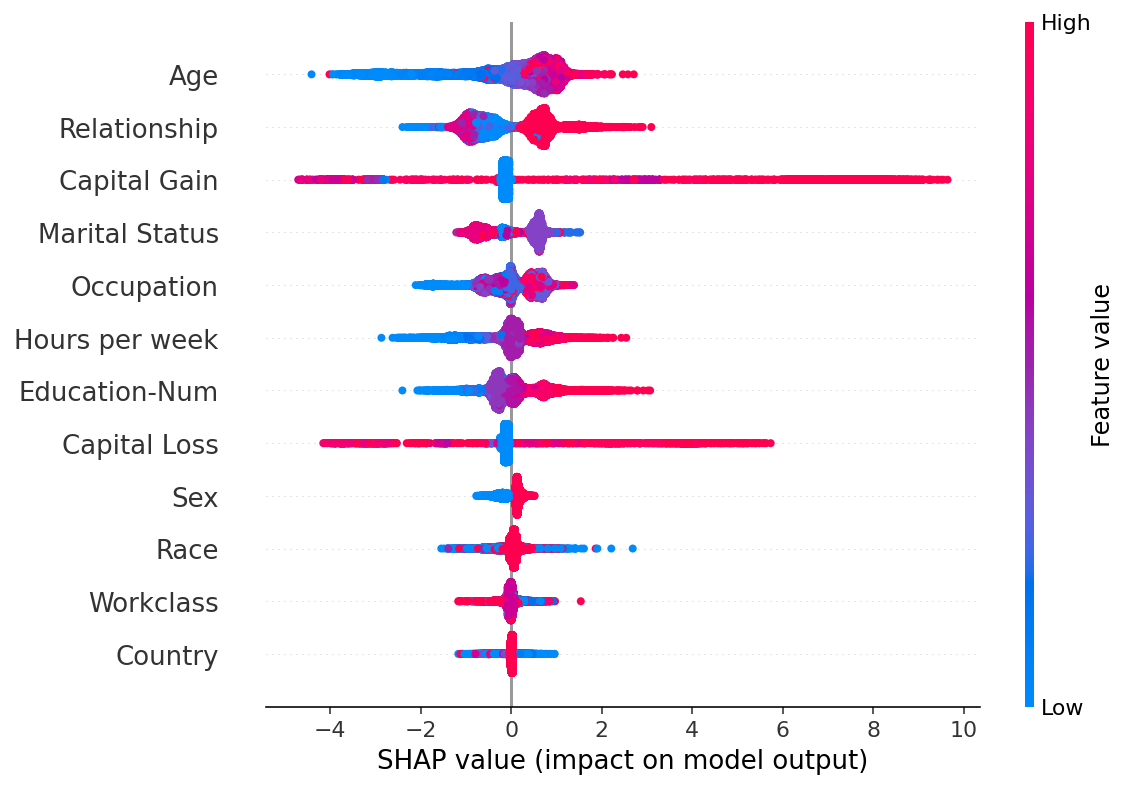

In [3]:
shap.plots.beeswarm(shap_values, max_display=20)

## Feature ordering

By default the features are ordered using `shap_values.abs.mean(0)`, which is the mean absolute value of the SHAP values for each feature. This order however places more emphasis on broad average impact, and less on rare but high magnitude impacts. If we want to find features with high impacts for individual people we can instead sort by the max absolute value:

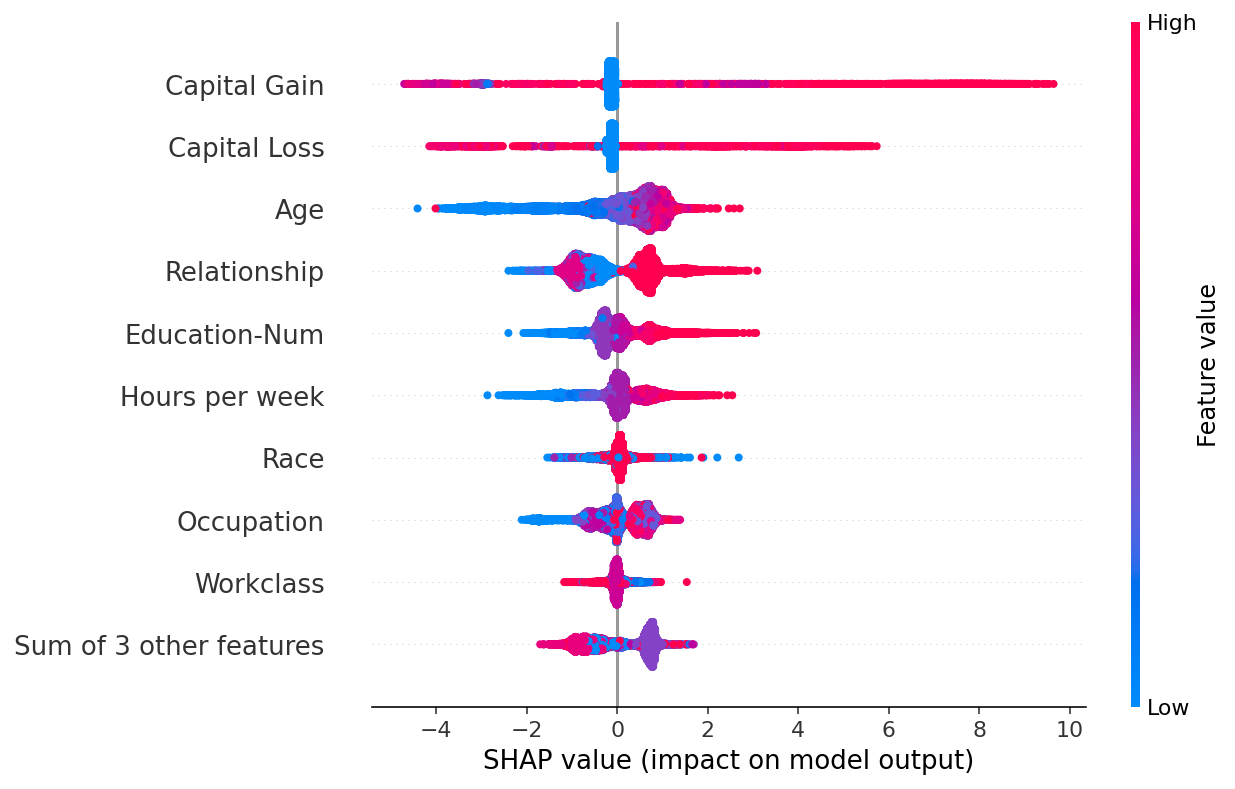

In [4]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

## Useful transforms

Sometimes it is helpful to transform the SHAP values before we plots them. Below we plot the absolute value and fix the color to be red. This creates a richer parallel to the standard `shap_values.abs.mean(0)` bar plot, since the bar plot just plots the mean value of the dots in the beeswarm plot.

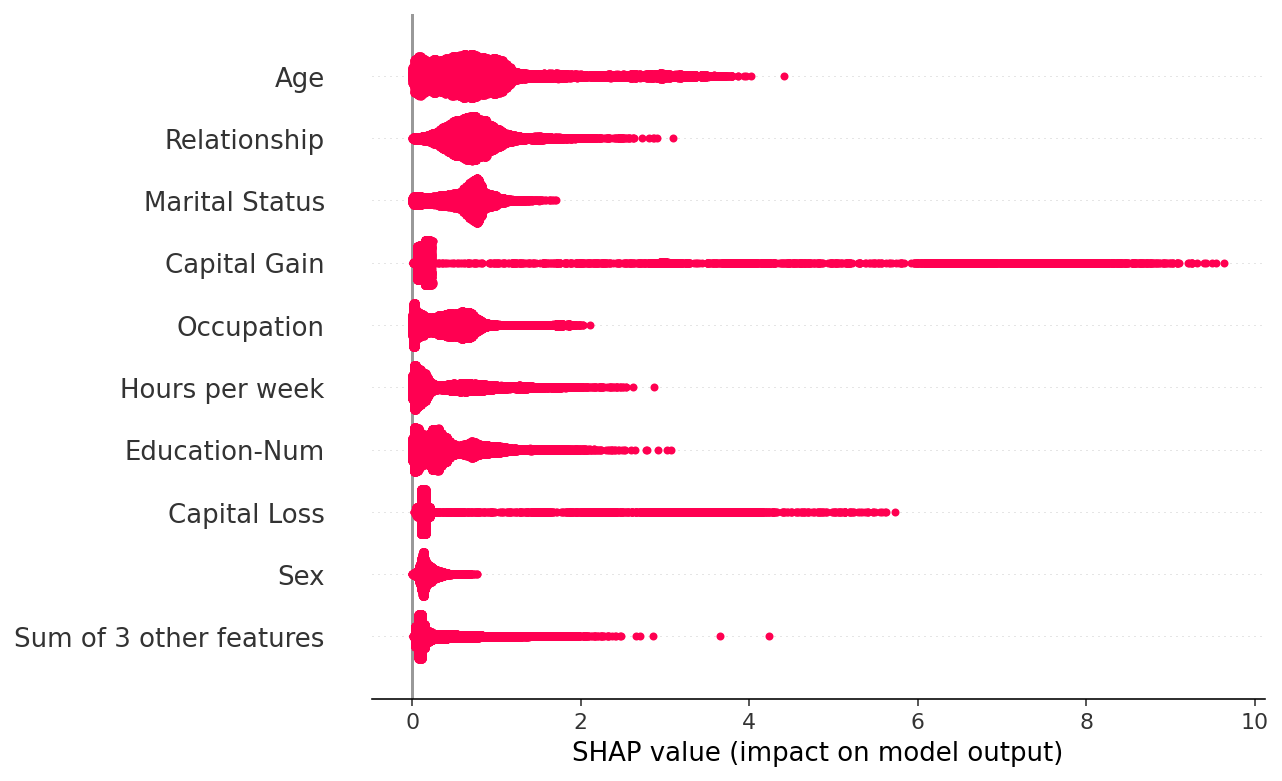

In [5]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

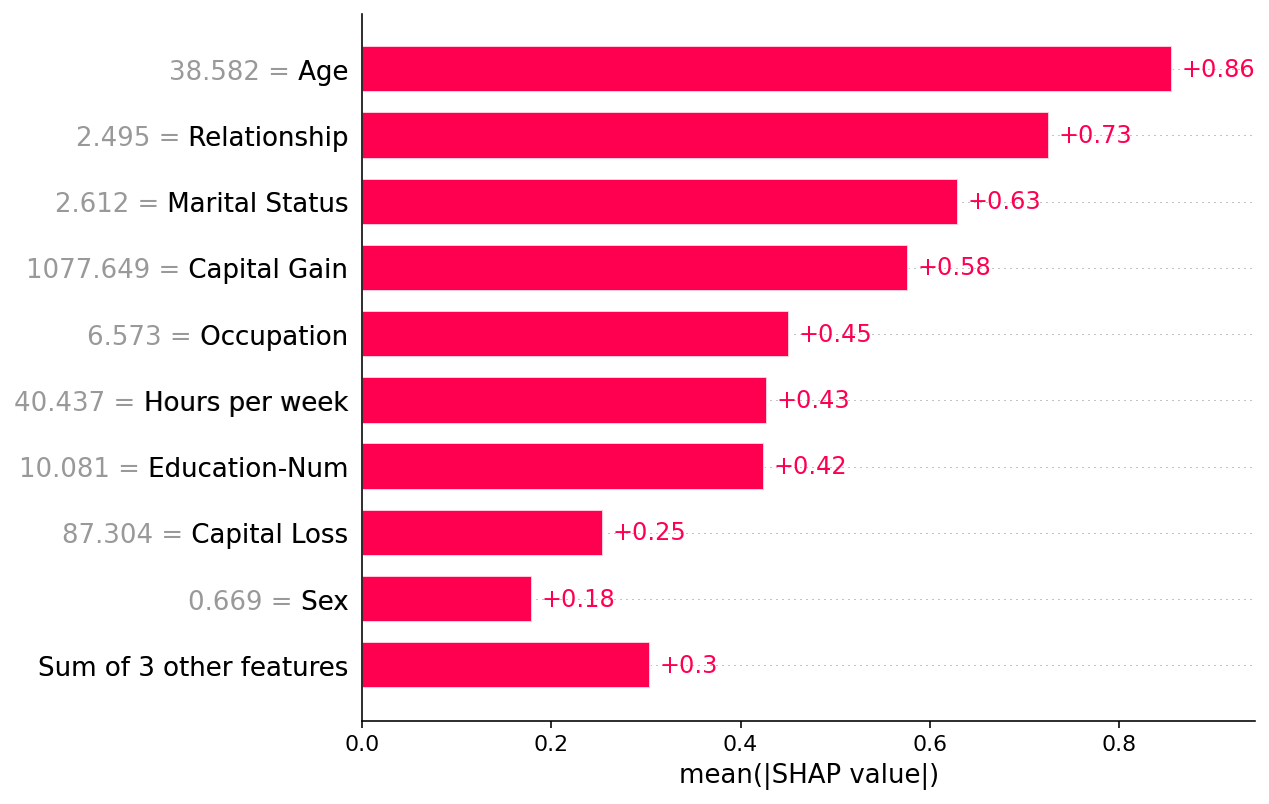

In [6]:
shap.plots.bar(shap_values.abs.mean(0))

## Custom colors

By default `beeswarm` uses the `shap.plots.colors.red_blue` color map, but you can pass any matplotlib color or colormap using the `color` parameter:

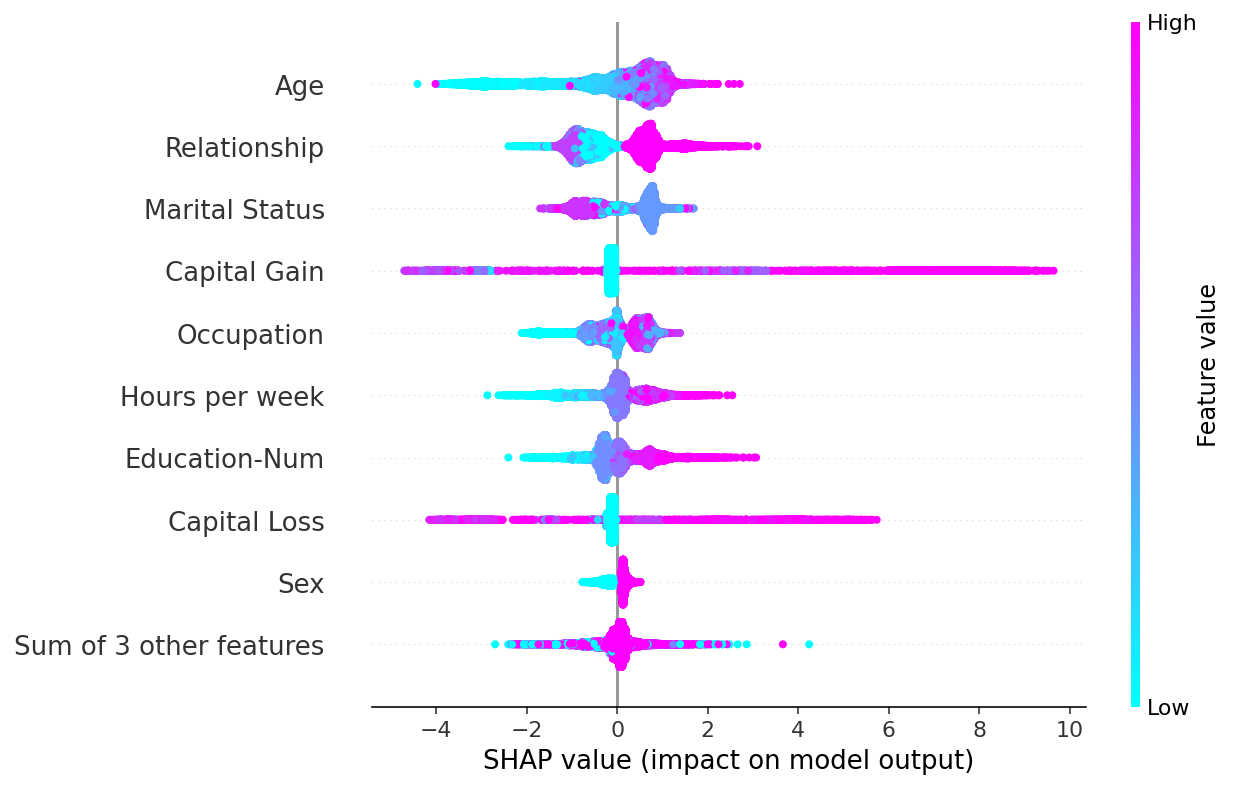

In [7]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 